In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Input Images**

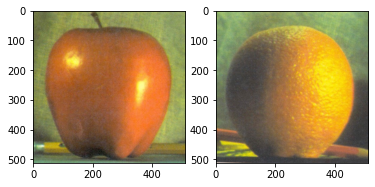

In [2]:
im_l = cv2.imread('l.jpg')
im_r = cv2.imread('r.jpg')

f,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(cv2.cvtColor(im_l, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(im_r, cv2.COLOR_BGR2RGB))
plt.show()

**Simple Concatenation**

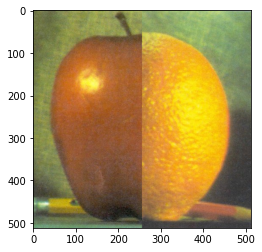

In [3]:
easyout = np.concatenate( (im_l[:,:256,:], im_r[:,256:,:]), axis=1)

cv2.imwrite('out_concatenated.jpg', easyout)

plt.imshow(cv2.cvtColor(easyout, cv2.COLOR_BGR2RGB))
plt.show()

**Creating Masks**

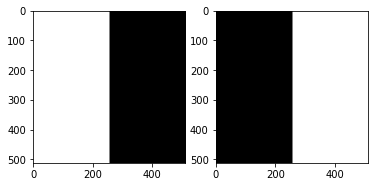

In [4]:
s = (512, 256)
im_r_mask = np.concatenate( (np.zeros(s), np.ones(s)*255), axis=1).astype('uint8')
im_l_mask = np.concatenate( (np.ones(s)*255, np.zeros(s)), axis=1).astype('uint8')

f,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(im_l_mask, cmap='gray')
ax2.imshow(im_r_mask, cmap='gray')
plt.show()

**MultiBandBlender**

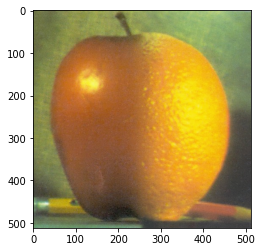

In [5]:
blender = cv2.detail.Blender_createDefault(cv2.detail.BLENDER_MULTI_BAND, try_gpu=True)
blender.prepare((0,0,512,512))

blender.feed(im_l, im_l_mask, (0,0))
blender.feed(im_r, im_r_mask, (0,0))

res = (np.zeros((512,512,3))).astype('uint8')
res_mask = (np.ones((512,512))*255).astype('uint8')

out, out_mask = blender.blend(res,res_mask)

cv2.imwrite('out_blended.jpg',out.astype('uint8'))

plt.imshow(cv2.cvtColor(out.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.show()